In [797]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

128 128


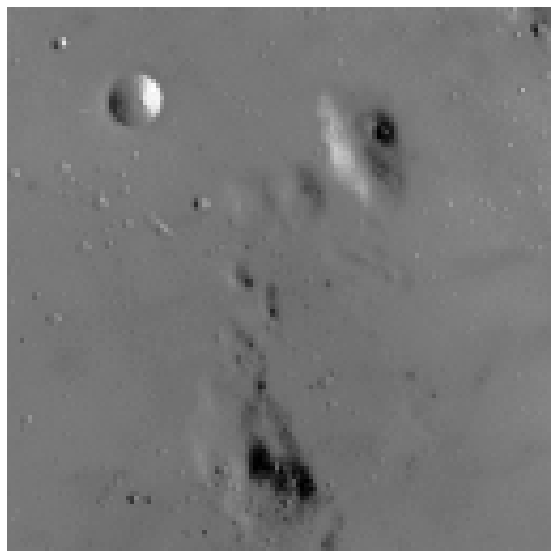

In [798]:
img_crowd = cv2.imread("moo2.png")
h, w = img_crowd.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_RGB2GRAY), cmap="gray")

# Histogram Equalization

In [799]:
global_number_bins = 256

In [800]:
def l_count_per_pixel(image, channel, normFlag):
    possible_l = 256
    pix_counts = [0] * possible_l # store number of pixels for each possible l value

    w, h = image.shape[:2]

    l_val = 0

    for y in range(h):
        for x in range(w):
            # for each pixel, get l value
            l_val = image[x,y][channel]

            pix_counts[l_val] = pix_counts[l_val] + 1

    # if flagged, normalize
    if(normFlag):
        for i in range(len(pix_counts)):
            pix_counts[i] = pix_counts[i]/(w*h)

    #print(np.sum(pix_counts))
    return pix_counts

In [801]:
def opencv_hist(image, channel, number_bins, normFlag):
    hist = cv2.calcHist([image], [channel], None, [number_bins], [0, 256])

    if(normFlag):
        hist /=  hist.sum()

    return hist

In [802]:
def create_chistogram(hist, chist, number_bins):
    
    sum = 0

    for i in range(0, number_bins):
        sum = 0
        for j in range(0, i):
            sum = sum + hist[j]
        chist[i] = sum 

    return chist

In [803]:
def plot_hist(plot, number_bins, title):
    # plot the histogram
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("% of Pixels")
    plt.plot(plot)
    plt.xlim([0, number_bins])
    plt.show()

In [804]:
def image_histogram_equalization(image, channel, number_bins=global_number_bins):
    img_array = np.asarray(image)
    w, h = image.shape[:2]

    """
    Part (a): Normalized cumulative histogram
    """
    # Calculate histogram aka probability density function via binning, and normalize

    chistogram_array = np.empty([256,1])

    #trying out opencv's histogram function
    hist = opencv_hist(img_array, channel, number_bins, 1)
    plot_hist(hist, number_bins, "Intensity Histogam")

    chistogram_array = hist.cumsum()
    plot_hist(chistogram_array, number_bins, "Cumulative Histogam")  

    '''#using my functions
    hist = l_count_per_pixel(image, 0, 1)
    plot_hist(hist, number_bins)
    
    # Calculate cumulative histogram aka cumulative density function 
    create_chistogram(hist, chistogram_array, number_bins)
    plot_hist(chistogram_array, number_bins)''' 


    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.empty([256,1]).astype(np.uint8)

    vals_per_bin = 256/number_bins
    chist_index = 0
    chist_iter = 0

    #for every possible l value
    for i in range(0, 256):
        transform_map[i] = 255 * chistogram_array[chist_index]

        chist_iter = chist_iter + 1
        if(chist_iter >= vals_per_bin):
            chist_iter = 0
            chist_index = chist_index + 1

    plot_hist(transform_map, number_bins, "Transform Map")

    """
    STEP 3: Apply the transformation T to reassign equalized pixel intensity 
    """    
    # transform pixel values to equalize -- insert code

    for y in range(h):
        for x in range(w):
            # for each pixel, get l value
            index = img_array[x,y][channel]

            img_array[x,y][channel] = transform_map[index]

    # reshape and write back into img_array
    eq_img_array = img_array

    #show equalized histogram
    hist = l_count_per_pixel(img_array, channel, 1)
    plot_hist(hist, number_bins, "Equalized Histogam")

    #create_chistogram(hist, chistogram_array, number_bins)
    #plot_hist(chistogram_array, number_bins)

    return eq_img_array

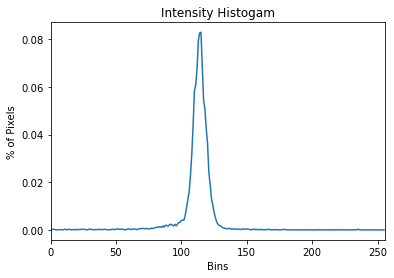

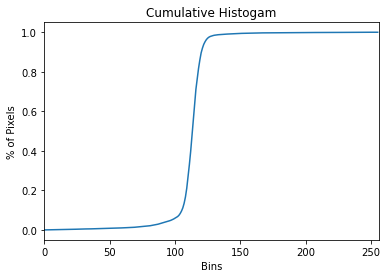

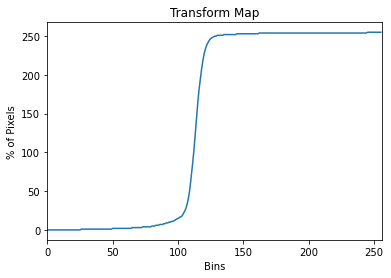

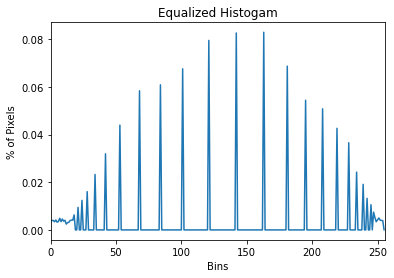

True

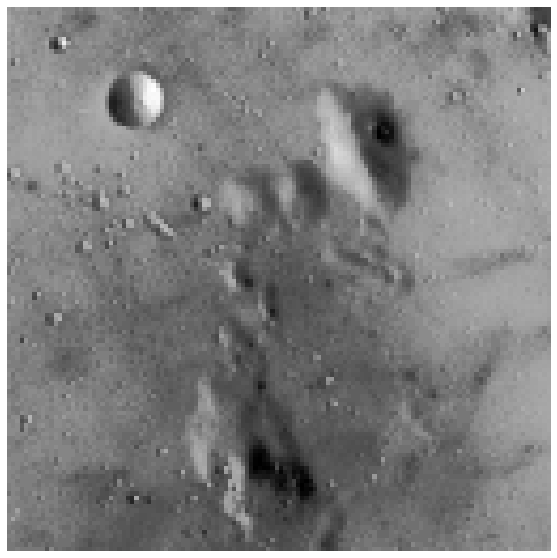

In [805]:
img_equalized = image_histogram_equalization(img_crowd, 0)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")

filename = 'moonequ_%d.png' % global_number_bins
cv2.imwrite(filename,cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY))

## Process multiple images

720 1280


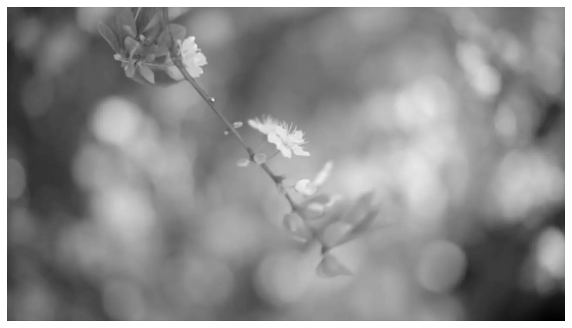

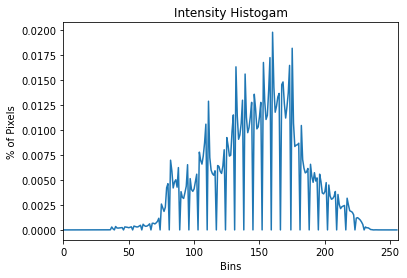

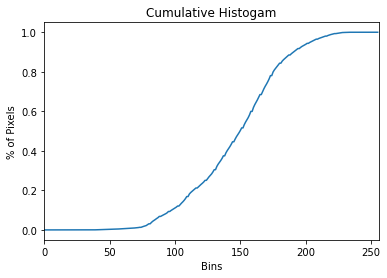

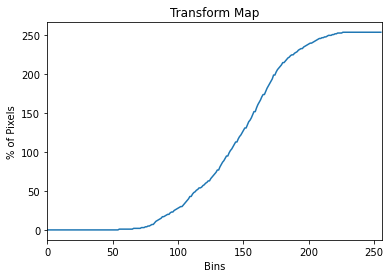

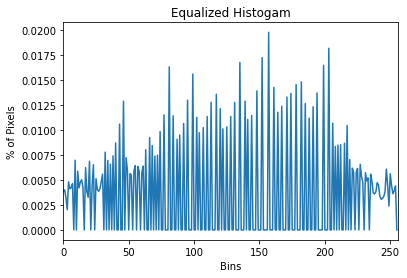

True

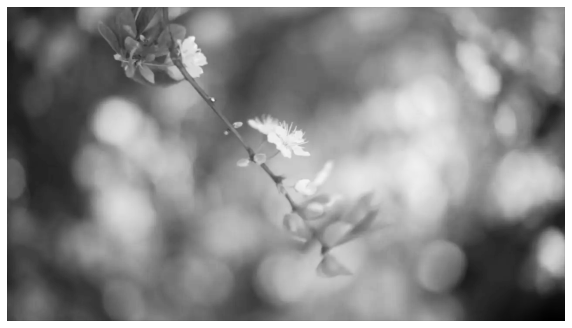

In [806]:
img_crowd = cv2.imread("flower.png")
h, w = img_crowd.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_RGB2GRAY), cmap="gray")

img_equalized = image_histogram_equalization(img_crowd, 0)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")

filename = 'flowerequ_%d.png' % global_number_bins
cv2.imwrite(filename,cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY))

510 512


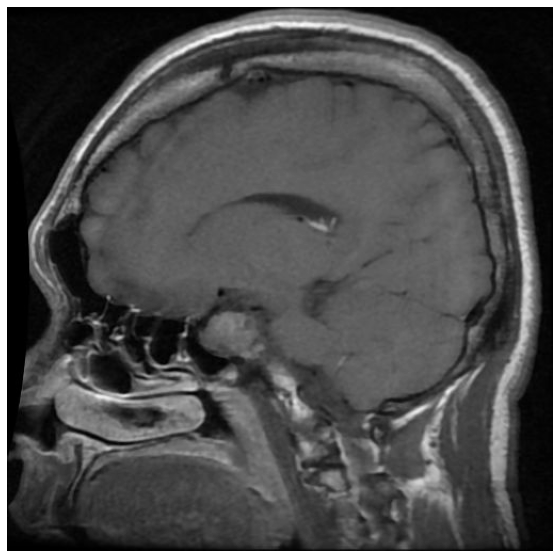

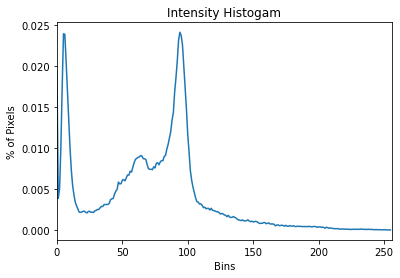

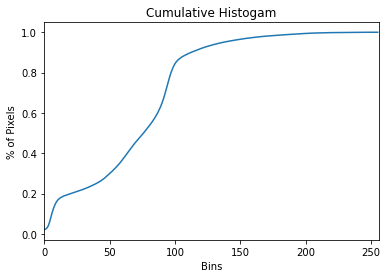

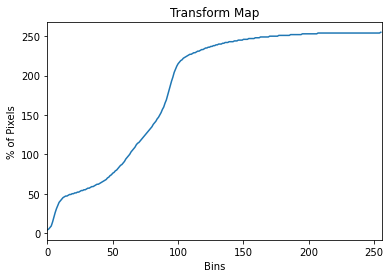

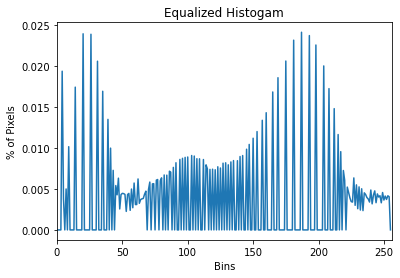

True

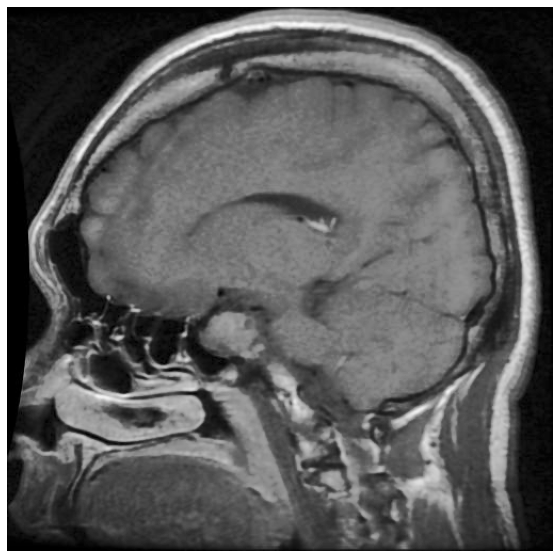

In [807]:
img = cv2.imread("brain.png")
h, w = img.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")

img_equalized = image_histogram_equalization(img, 0)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")

filename = 'brainequ_%d.png' % global_number_bins
cv2.imwrite(filename,cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY))

# Color Images

2048 1536


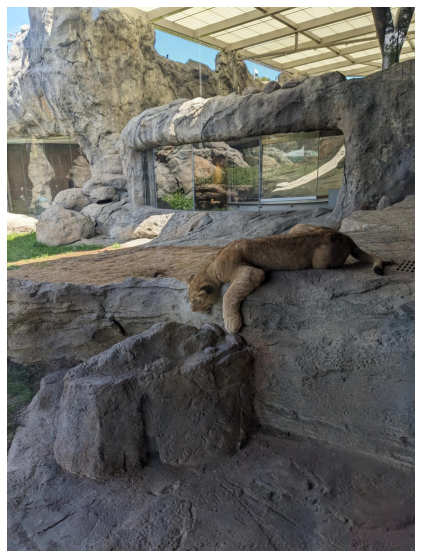

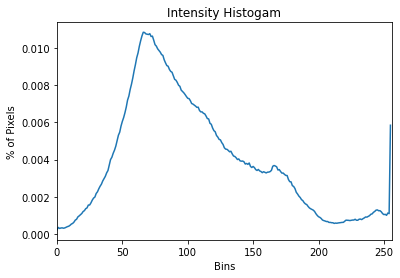

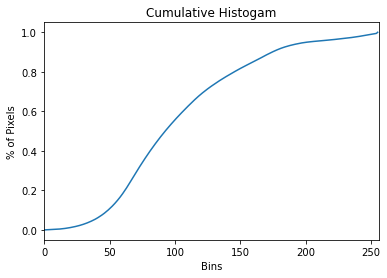

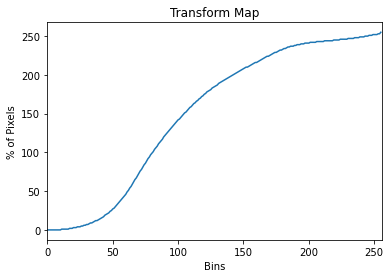

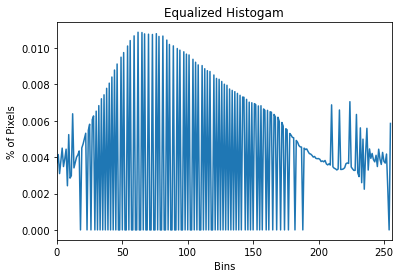

True

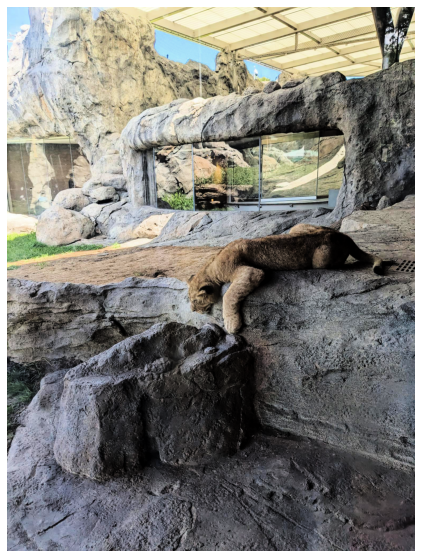

In [808]:
img = cv2.imread("lpzoo-lion.jpeg")
h, w = img.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_equalized = image_histogram_equalization(img, 2)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.uint8(img_equalized), cv2.COLOR_HSV2RGB))

filename = 'lionequ_%d.png' % global_number_bins
cv2.imwrite(filename,cv2.cvtColor(np.uint8(img_equalized), cv2.COLOR_HSV2BGR))

307 334


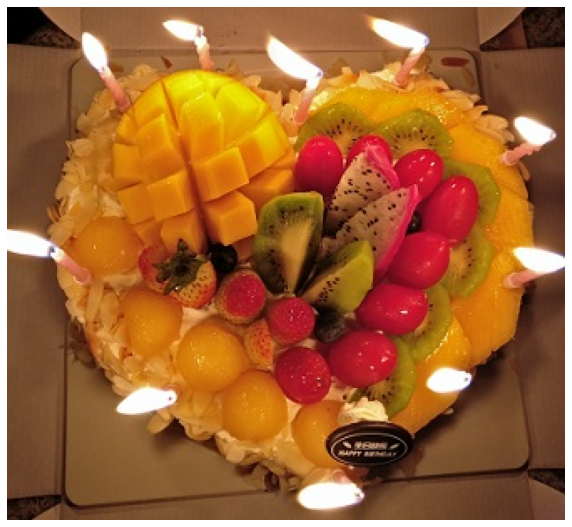

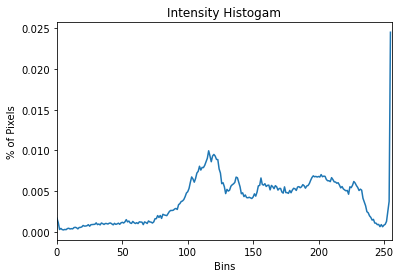

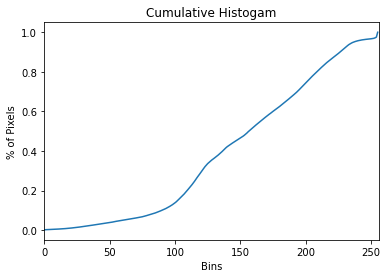

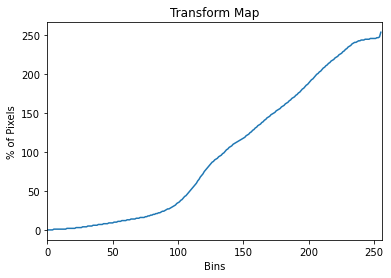

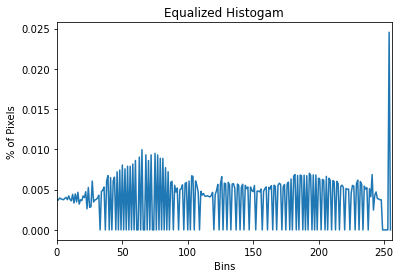

True

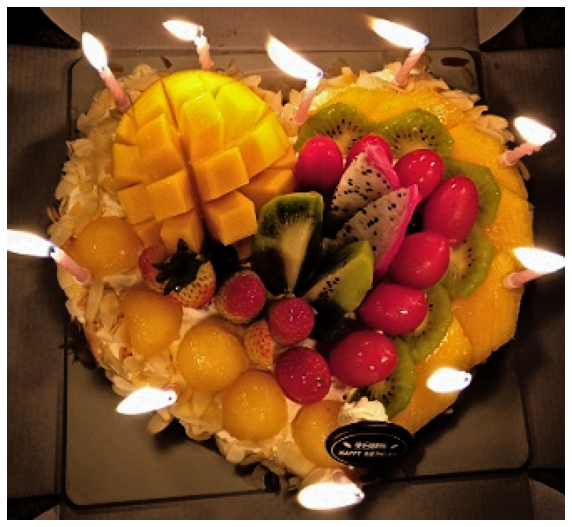

In [809]:
img = cv2.imread("rgb-1-fruits.bmp")
h, w = img.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_equalized = image_histogram_equalization(img, 2)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.uint8(img_equalized), cv2.COLOR_HSV2RGB))

filename = 'fruitequ_%d.png' % global_number_bins
cv2.imwrite(filename,cv2.cvtColor(np.uint8(img_equalized), cv2.COLOR_HSV2BGR))

## Monotonic Proof

In [812]:
def image_transform_map(image, channel, number_bins=global_number_bins):
    img_array = np.asarray(image)
    w, h = image.shape[:2]

    """
    Part (a): Normalized cumulative histogram
    """
    # Calculate histogram aka probability density function via binning, and normalize

    chistogram_array = np.empty([256,1])

    #trying out opencv's histogram function
    hist = opencv_hist(img_array, channel, number_bins, 1)
    #plot_hist(hist, number_bins, "Intensity Histogam")

    chistogram_array = hist.cumsum()
    #plot_hist(chistogram_array, number_bins, "Cumulative Histogam")  

    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.empty([256,1]).astype(np.uint8)

    vals_per_bin = 256/number_bins
    chist_index = 0
    chist_iter = 0

    #for every possible l value
    for i in range(0, 256):
        transform_map[i] = 255 * chistogram_array[chist_index]

        chist_iter = chist_iter + 1
        if(chist_iter >= vals_per_bin):
            chist_iter = 0
            chist_index = chist_index + 1

    #plot_hist(transform_map, number_bins, "Transform Map")

    return transform_map

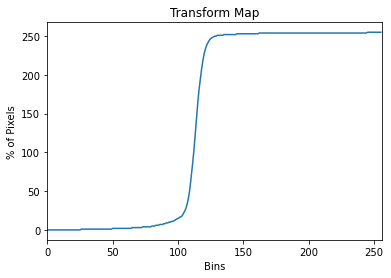

Transfomation Map is a monotonic tranformation


In [817]:
img = cv2.imread("moo2.png")

transform_map = image_transform_map(img, 0)

plot_hist(transform_map, global_number_bins, "Transform Map")

monoFlag = True
# If the map element 
for i in range (0,len(transform_map)):
    if(transform_map[i] > transform_map[i]):
        monoFlag = False
        print("Map is not monotonic")
        break

if(monoFlag == True):
    print("Transfomation Map is a monotonic tranformation")
